GBIF.org (26 October 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.gu5t27

## Questions 1 + 2

### Imports

In [18]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde
import seaborn as sns

In [2]:
original_data = pd.read_csv('kenya_birds.csv', sep='\t')
original_data.head()

/var/folders/cc/h352fz_d24n9tjfbnmrxstbh0000gn/T/ipykernel_8602/1727274082.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv('kenya_birds.csv', sep='\t')


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,1986821111,d1e8a7af-097a-4ca8-aa91-62d3ff834711,d33e1483-ad6a-4aa2-95bd-5d4568a3cd3b,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:54:52.894Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,1986821110,d1e8a7af-097a-4ca8-aa91-62d3ff834711,d12a2b54-f12a-40a7-bfb5-90b4998af7d3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:54:54.972Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,1986821109,d1e8a7af-097a-4ca8-aa91-62d3ff834711,ff92601a-f8b9-4db0-90a1-e4d0b233ace0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:54:57.153Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,1986821108,d1e8a7af-097a-4ca8-aa91-62d3ff834711,a6bf4a1c-5c59-4a23-a18a-4ca9e6c36342,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:55:11.136Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,1986821107,d1e8a7af-097a-4ca8-aa91-62d3ff834711,215c7fe0-9e39-4497-86b5-87532c478ef8,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:54:51.116Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


### Data pre-processing

First, let's remove rows that are irrelevant for our analysis:

In [3]:
df1 = original_data.drop(['gbifID', 'datasetKey', 'occurrenceID', 'verbatimScientificNameAuthorship', 'countryCode', 'publishingOrgKey', 'institutionCode', 'collectionCode', 
                 'catalogNumber', 'recordNumber', 'license', 'rightsHolder', 'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted'], axis=1)

df1.head()

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,...,day,month,year,taxonKey,speciesKey,basisOfRecord,identifiedBy,dateIdentified,mediaType,issue
0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,9,11,2017,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,NaN,SPECIES,"Zosterops senegalensis Bonaparte, 1850",...,1,6,2017,2489344,2489344.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,NaN,SPECIES,"Zosterops senegalensis Bonaparte, 1850",...,1,6,2017,2489344,2489344.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,6,10,2017,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,6,10,2017,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


Now, let's remove columns that are a form of duplicate of other columns:

In [4]:
df2 = df1.drop(['day', 'month', 'year', 'dateIdentified' # the date is contained in 'eventDate'
                ], axis=1)

df2.head()

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,...,elevationAccuracy,depth,depthAccuracy,eventDate,taxonKey,speciesKey,basisOfRecord,identifiedBy,mediaType,issue
0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,NaN,NaN,NaN,2017-11-09,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,NaN,SPECIES,"Zosterops senegalensis Bonaparte, 1850",...,NaN,NaN,NaN,2017-06-01,2489344,2489344.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,NaN,SPECIES,"Zosterops senegalensis Bonaparte, 1850",...,NaN,NaN,NaN,2017-06-01,2489344,2489344.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,NaN,NaN,NaN,2017-10-06,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,NaN,NaN,NaN,2017-10-06,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


Let's check for missing values:

In [5]:
missing_counts = df2.isnull().sum()

total_rows = len(df2)
missing_percentage = (missing_counts / total_rows) * 100

missing_summary = pd.DataFrame({
    'Column Name': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing Percentage': missing_percentage.values
})

print(missing_summary)

                      Column Name  Missing Count  Missing Percentage
0                         kingdom              0            0.000000
1                          phylum              0            0.000000
2                           class              0            0.000000
3                           order              0            0.000000
4                          family              0            0.000000
5                           genus              0            0.000000
6                         species            185            0.206400
7            infraspecificEpithet          89593           99.956489
8                       taxonRank              0            0.000000
9                  scientificName              0            0.000000
10         verbatimScientificName              0            0.000000
11                       locality          89632          100.000000
12                  stateProvince          89632          100.000000
13               occurrenceStatus 

Let's remove the columns with nearly all, or all values missing:

In [6]:
df3 = df2.drop(['infraspecificEpithet', 'locality', 'stateProvince', 'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation', 'elevationAccuracy',
                'depth', 'depthAccuracy', 'identifiedBy', 'mediaType'], axis=1)

df3.head()

,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,verbatimScientificName,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,eventDate,taxonKey,speciesKey,basisOfRecord,issue
0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,PRESENT,1.0,-3.432285,38.341012,2017-11-09,6100772,6100772.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,SPECIES,"Zosterops senegalensis Bonaparte, 1850",Zosterops senegalensis,PRESENT,1.0,0.206000,34.884667,2017-06-01,2489344,2489344.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,SPECIES,"Zosterops senegalensis Bonaparte, 1850",Zosterops senegalensis,PRESENT,4.0,-0.558500,36.523667,2017-06-01,2489344,2489344.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,PRESENT,1.0,-3.399601,38.329516,2017-10-06,6100772,6100772.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,PRESENT,1.0,-3.380438,38.353286,2017-10-06,6100772,6100772.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


In [7]:
unique_occurrence_status = df3['occurrenceStatus'].unique()
unique_basis_of_record = df3['basisOfRecord'].unique()

print("Unique values in 'occurrenceStatus':")
print(unique_occurrence_status)

print("\nUnique values in 'basisOfRecord':")
print(unique_basis_of_record)

Unique values in 'occurrenceStatus':
['PRESENT']

Unique values in 'basisOfRecord':
['HUMAN_OBSERVATION']


Let's remove those columns as well since they take the same value for all rows:

In [8]:
df = df3.drop(['occurrenceStatus', 'basisOfRecord'], axis=1)

df.head()

,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,verbatimScientificName,individualCount,decimalLatitude,decimalLongitude,eventDate,taxonKey,speciesKey,issue
0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,1.0,-3.432285,38.341012,2017-11-09,6100772,6100772.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,SPECIES,"Zosterops senegalensis Bonaparte, 1850",Zosterops senegalensis,1.0,0.206000,34.884667,2017-06-01,2489344,2489344.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,SPECIES,"Zosterops senegalensis Bonaparte, 1850",Zosterops senegalensis,4.0,-0.558500,36.523667,2017-06-01,2489344,2489344.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,1.0,-3.399601,38.329516,2017-10-06,6100772,6100772.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,1.0,-3.380438,38.353286,2017-10-06,6100772,6100772.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


In [9]:
df.shape

(89632, 17)

### Question 1

In [10]:
df['order'].nunique()

28

Let's plot:

/var/folders/cc/h352fz_d24n9tjfbnmrxstbh0000gn/T/ipykernel_8602/2697733632.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20b', len(unique_orders))


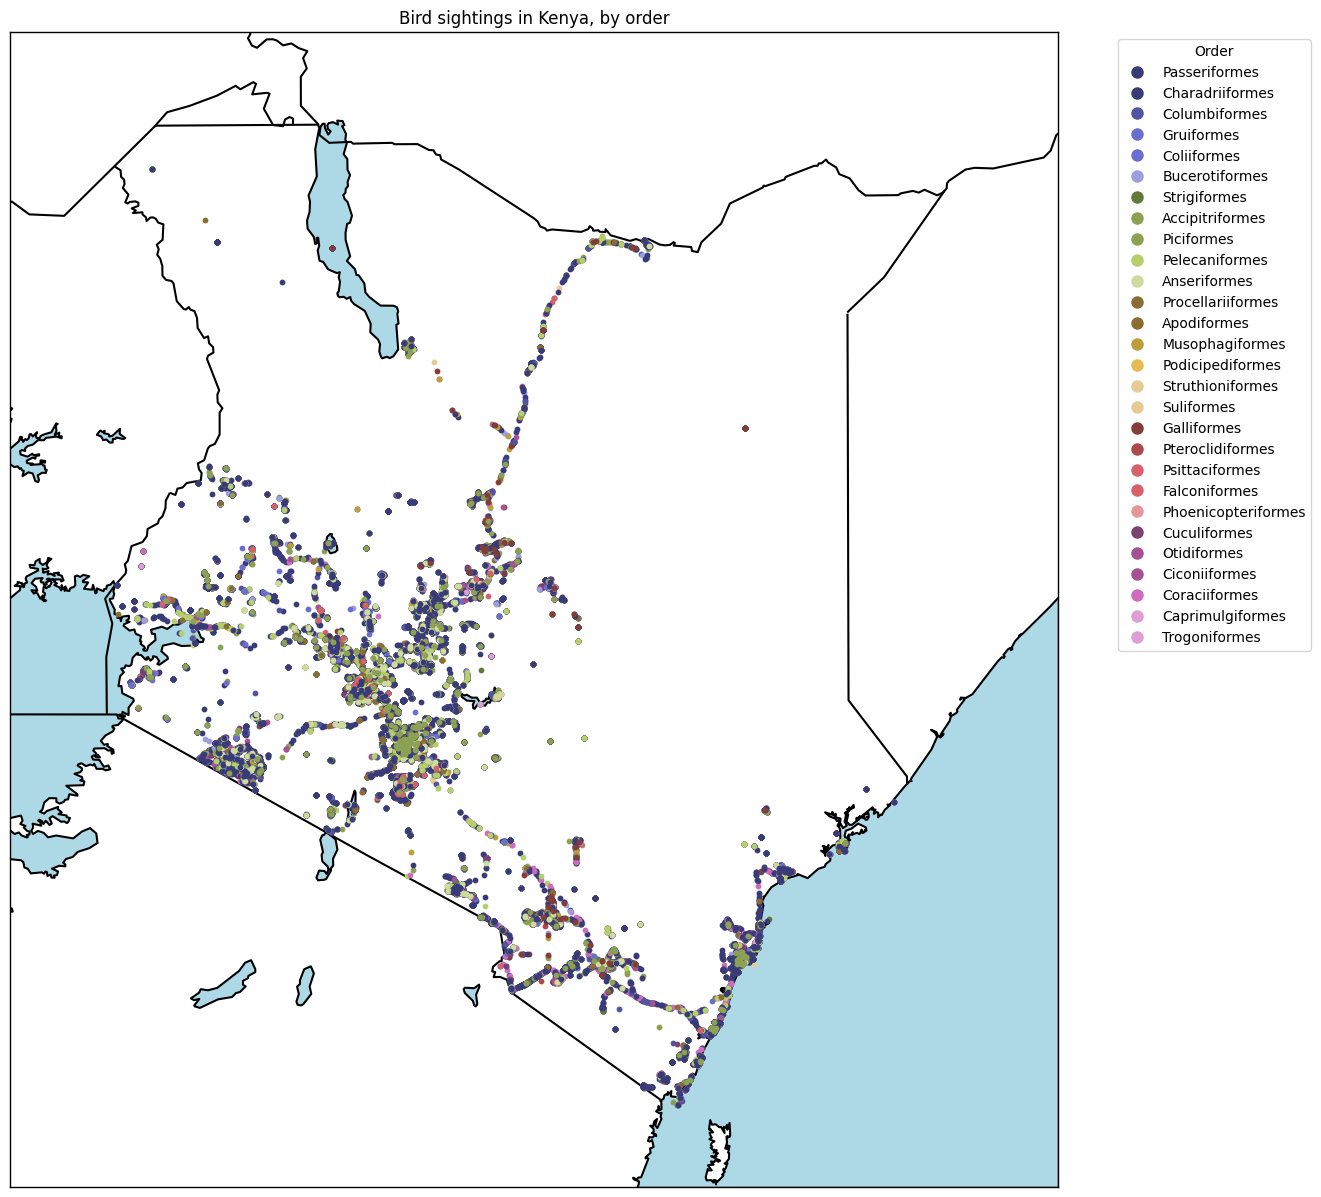

In [30]:
# df_subset = df.head(10000)

# Get unique values from the 'order' column
unique_orders = df['order'].unique()

# Create a color map
colors = plt.cm.get_cmap('tab20b', len(unique_orders)) 

# Map unique values to colors
order_color_map = {order: colors(i) for i, order in enumerate(unique_orders)}

plt.figure(figsize=(20, 15))
m = Basemap(projection='merc',
            llcrnrlat=-5.5, urcrnrlat=5.5,  # Latitude limits
            llcrnrlon=33, urcrnrlon=43,  # Longitude limits
            resolution='i')

m.drawmapboundary(fill_color='lightblue')  # Ocean color
m.fillcontinents(color='white', lake_color='lightblue')  # Land color
m.drawcountries(linewidth=1.5, color='black')  # Country boundaries
m.drawcoastlines(linewidth=1.5, color='black')  # Coastline

# Plot each point with the corresponding color
for index, row in df.iterrows():
    x, y = m(row['decimalLongitude'], row['decimalLatitude'])
    plt.scatter(x, y, marker='o', color=order_color_map[row['order']], zorder=5, label=row['order'], s=10)

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=order_color_map[order], markersize=10) for order in unique_orders]
plt.legend(handles, unique_orders, title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Bird sightings in Kenya, by order')
plt.show()

Interesting pattern going north, turns out it's one of Kenya's national highways, the A2. The other sightings following a line are other major roads. It makes sense since probably much more people take those roads than the smaller ones in the countryside, hence there is more people who could spot birds. Also, these roads are much easier to access than any small road.

There are a lot if sightings by the coast, which does make sense since birds tend to cluster by coasts to look for food.

There is an interesting cluster at the western part of the south border, which turns out to be the Maasai Mara National Reserve.

Apart from that, most sightings were noted at the heart of the country, where most people live (Nairobi, Nakuru, Nyeri), as well as a very tall mountain Kirinyaga, which could potentially be a touristic spot.

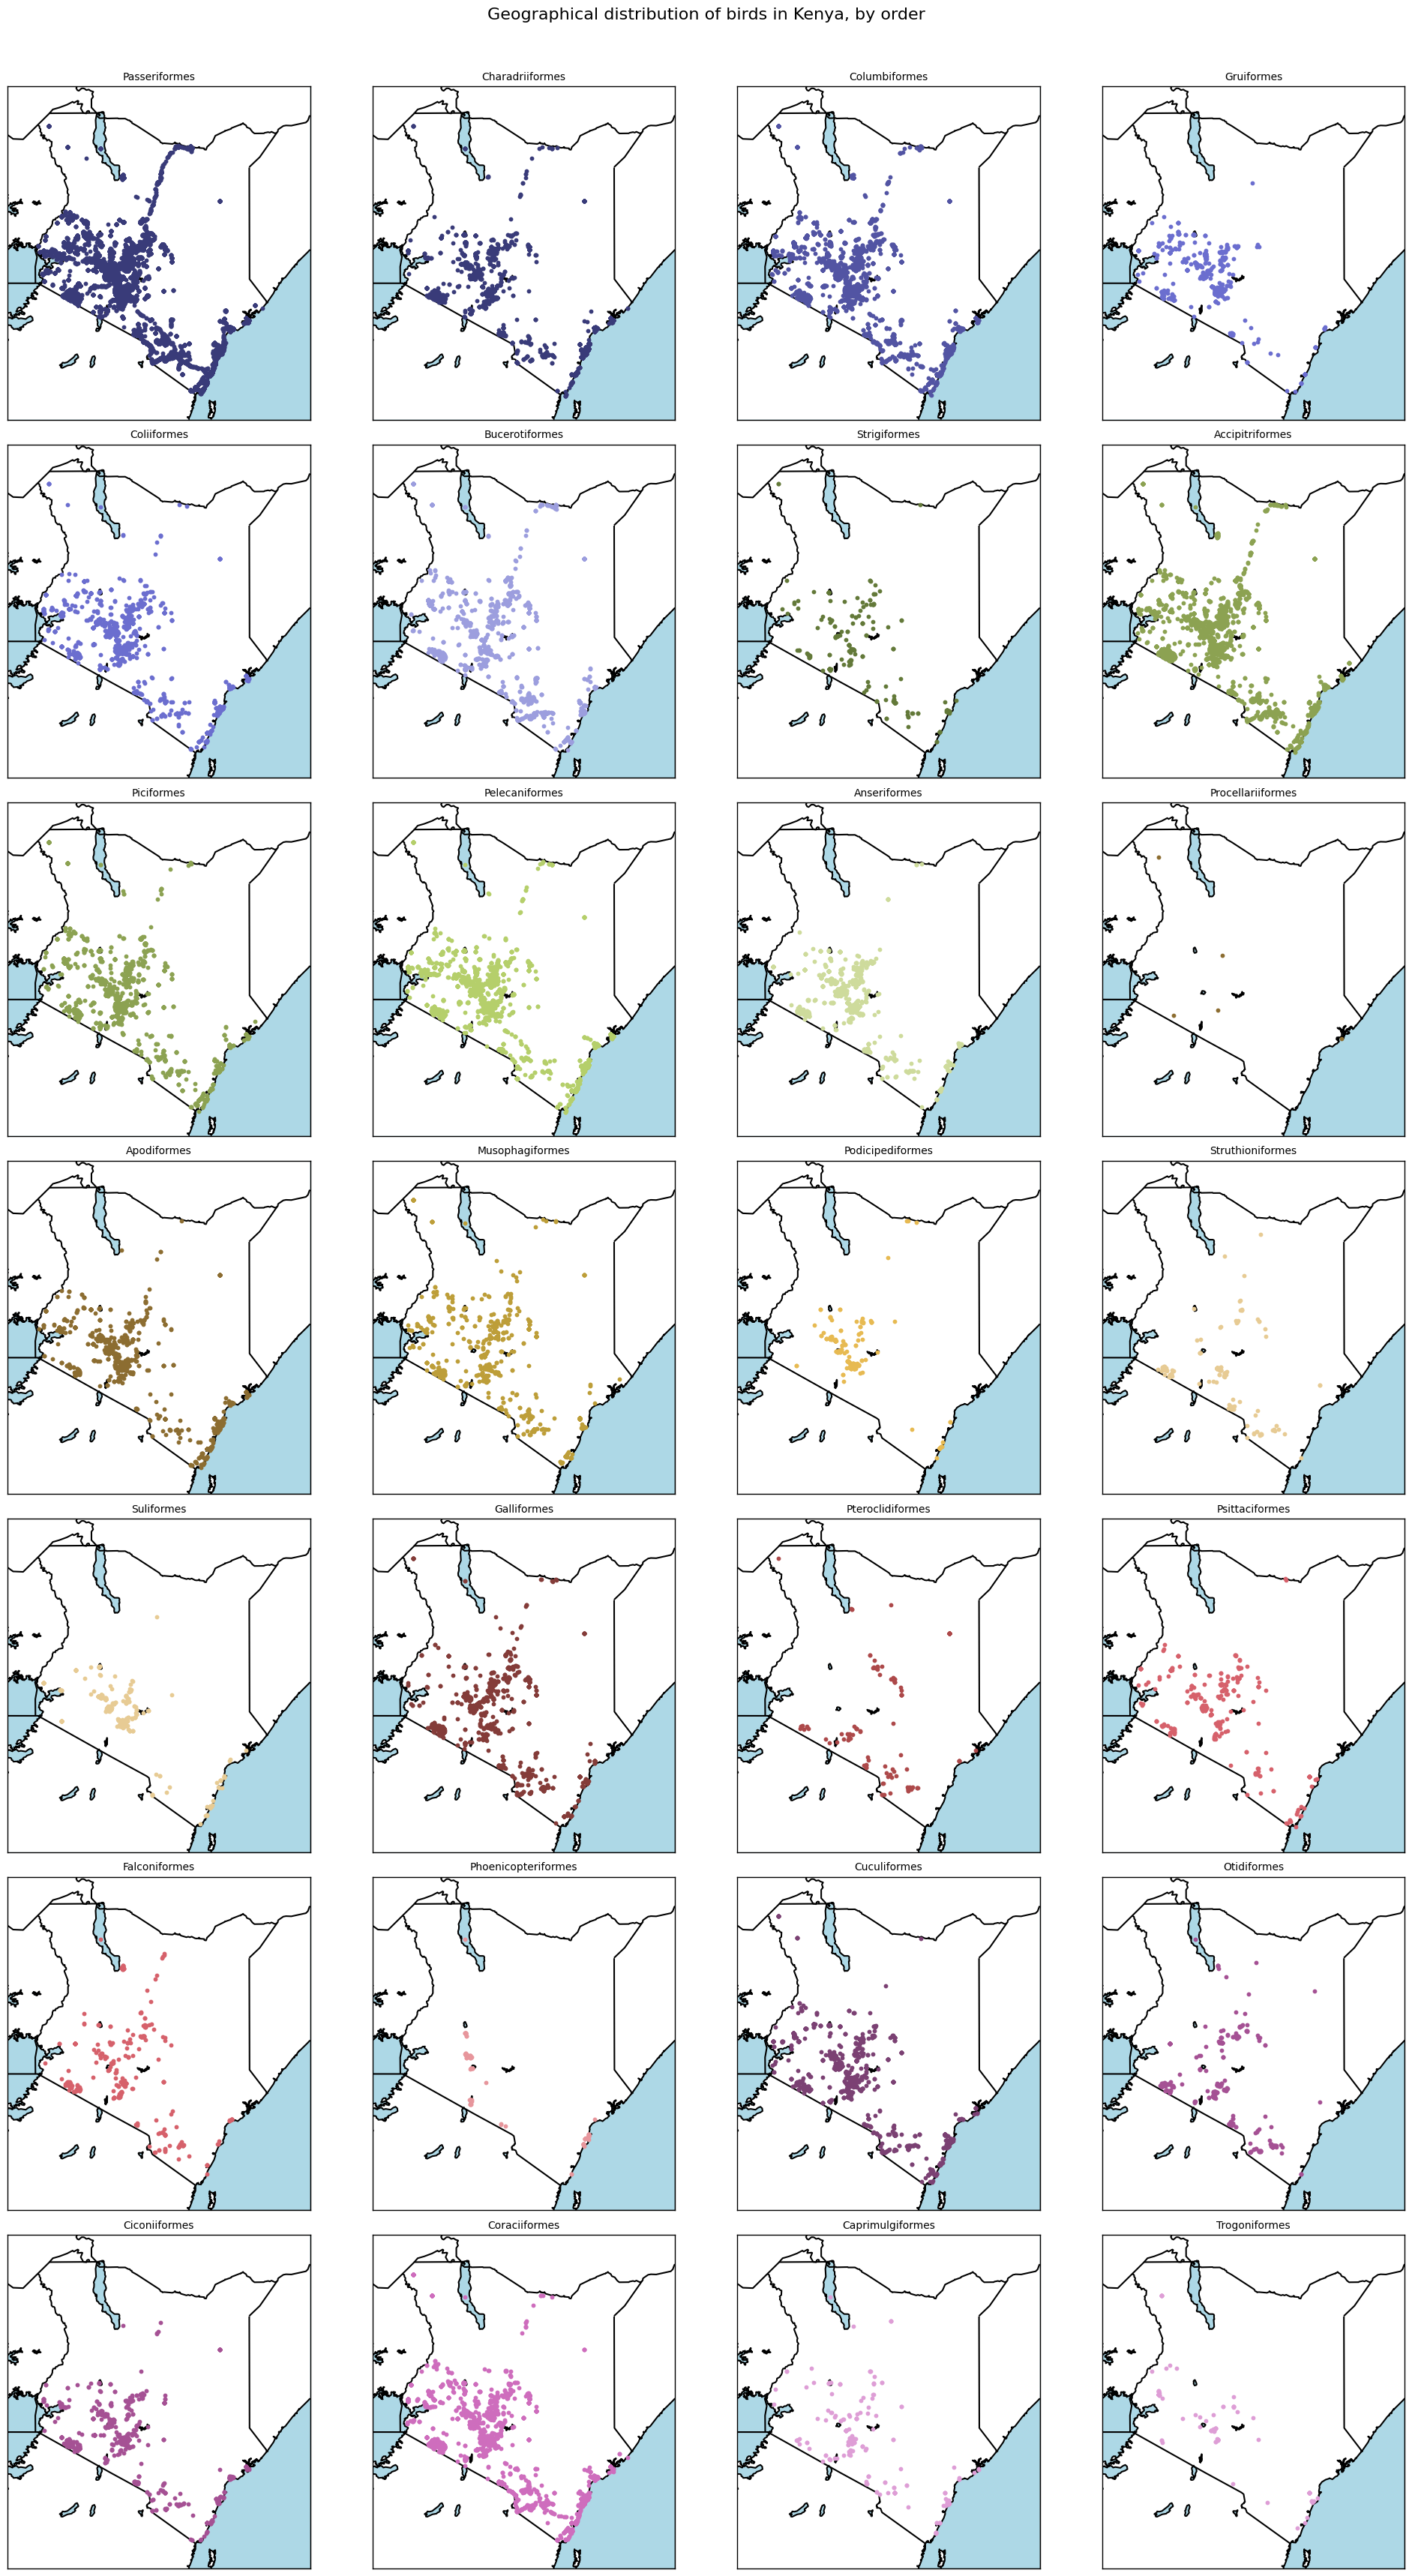

In [32]:
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(20, 35))
axs = axs.flatten()

# Loop through each unique order and create a map
for i, order in enumerate(unique_orders):
    df_order = df[df['order'] == order] #.head(100) Limit to the first 100 entries for now

    # Create Basemap for the current subplot
    m = Basemap(projection='merc',
                llcrnrlat=-5.5, urcrnrlat=5.5,  # Latitude limits
                llcrnrlon=33, urcrnrlon=43,  # Longitude limits
                resolution='i', ax=axs[i])

    m.drawmapboundary(fill_color='lightblue')  # Ocean color
    m.fillcontinents(color='white', lake_color='lightblue')  # Land color
    m.drawcountries(linewidth=1.5, color='black')  # Country boundaries
    m.drawcoastlines(linewidth=1.5, color='black')  # Coastline

    # Plot the points for the current order using the inherited color mapping
    if not df_order.empty:  # Check if there's data to plot
        x, y = m(df_order['decimalLongitude'].values, df_order['decimalLatitude'].values)
        m.scatter(x, y, marker='o', color=order_color_map[order], zorder=5, s=10)

    # Set the title for the subplot
    axs[i].set_title(order, fontsize=10)

plt.tight_layout()
plt.suptitle('Geographical distribution of birds in Kenya, by order', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

### Question 2

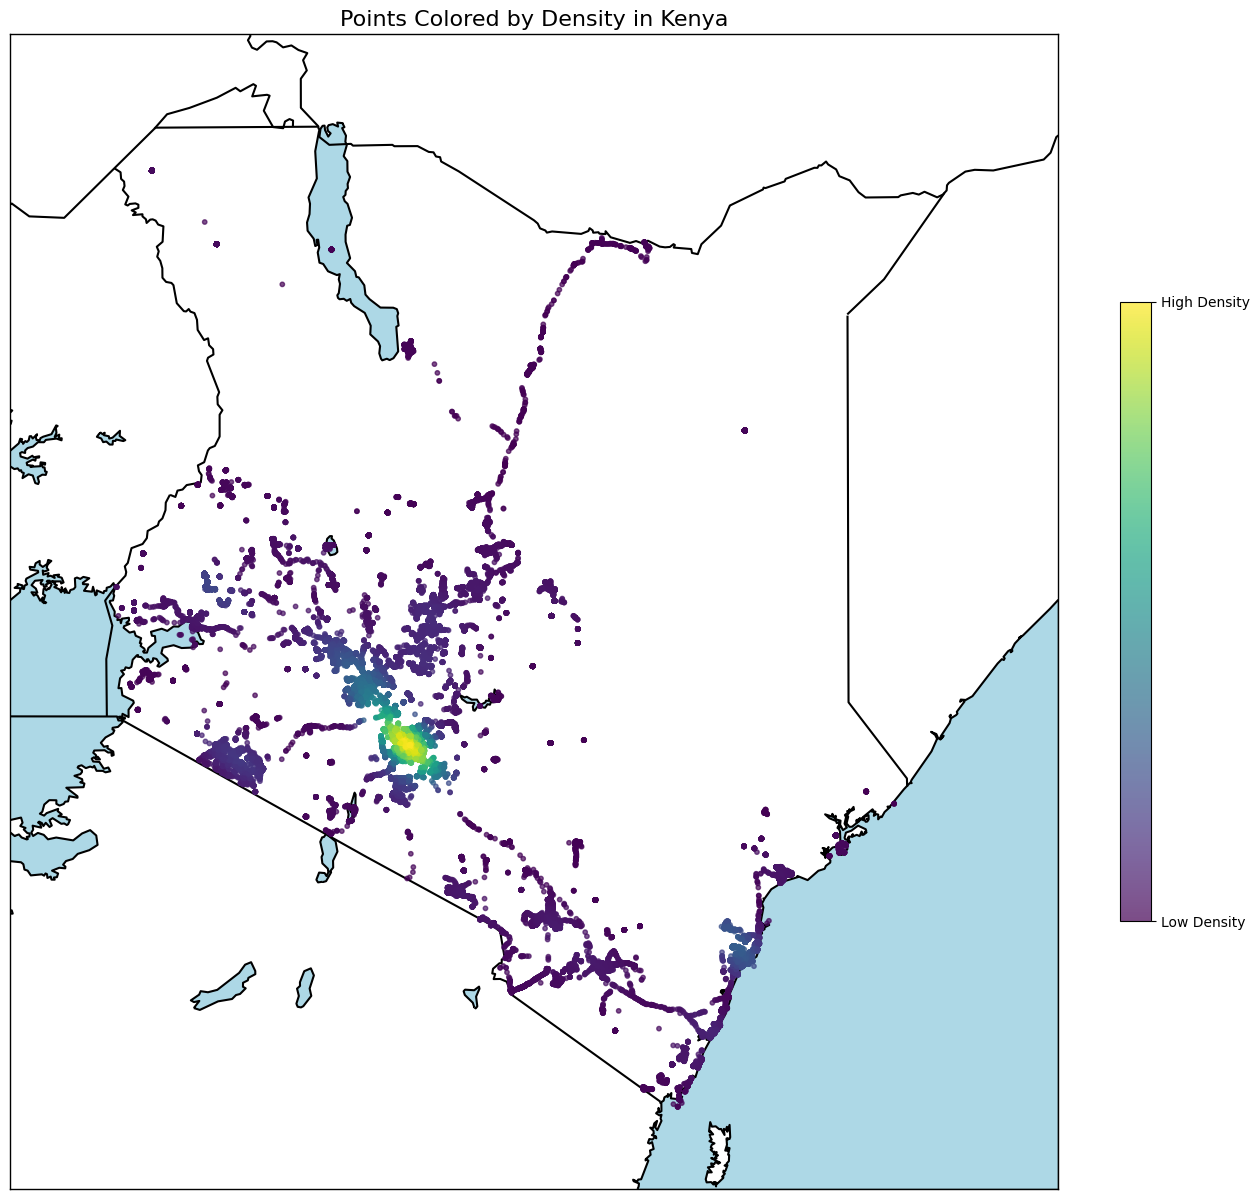

In [33]:
plt.figure(figsize=(20, 15))
m = Basemap(projection='merc',
            llcrnrlat=-5.5, urcrnrlat=5.5,  # Latitude limits
            llcrnrlon=33, urcrnrlon=43,  # Longitude limits
            resolution='i')

m.drawmapboundary(fill_color='lightblue')  # Ocean color
m.fillcontinents(color='white', lake_color='lightblue')  # Land color
m.drawcountries(linewidth=1.5, color='black')  # Country boundaries
m.drawcoastlines(linewidth=1.5, color='black')  # Coastline

# Extract the latitude and longitude
latitudes = df['decimalLatitude'].values
longitudes = df['decimalLongitude'].values

# Create a grid for the density estimation
lon_grid = np.linspace(33, 43, 100)  # Longitude grid
lat_grid = np.linspace(-5.5, 5.5, 100)  # Latitude grid
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Flatten the grid to evaluate the density
positions = np.vstack([lon_mesh.ravel(), lat_mesh.ravel()])
values = np.vstack([longitudes, latitudes])

# Create a Gaussian KDE
kde = gaussian_kde(values)

# Evaluate the density on the grid
density = kde(positions).reshape(lon_mesh.shape)

# Normalize the density for colormap
density_normalized = (density - density.min()) / (density.max() - density.min())

# Create a colormap for the density
cmap = plt.get_cmap('viridis')

# Calculate the density value for each point and map to colors
point_density = kde(np.vstack([longitudes, latitudes]))
colors = cmap((point_density - point_density.min()) / (point_density.max() - point_density.min()))

# Plot the points with the corresponding colors
x_points, y_points = m(longitudes, latitudes)
scatter = m.scatter(x_points, y_points, marker='o', color=colors, zorder=5, alpha=0.7, s=10)

cbar = plt.colorbar(scatter, orientation='vertical', fraction=0.02, pad=0.04)

cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Low Density', 'High Density'])

plt.title('Density of bird sighhtings in Kenya', fontsize=16)
plt.show()

aaaa wait what about the column individualCount... maybe we need to take this into account... we'll see

let's consider individualCount as weight of each sighting so that a higher count contributes more heavily to the density

now, that column has 80 missing values, so let's first handle those:

In [43]:
df['individualCount'].describe()

count    89552.000000
mean         2.081472
std         34.485674
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       7000.000000
Name: individualCount, dtype: float64

we see that apart from some outliers, most counts are quite small and the median is 1. Let's replace all missing values with the median:

In [44]:
df['individualCount'].fillna(df['individualCount'].median(), inplace=True)

In [46]:
df['individualCount'].isnull().sum()

0

all good to proceed

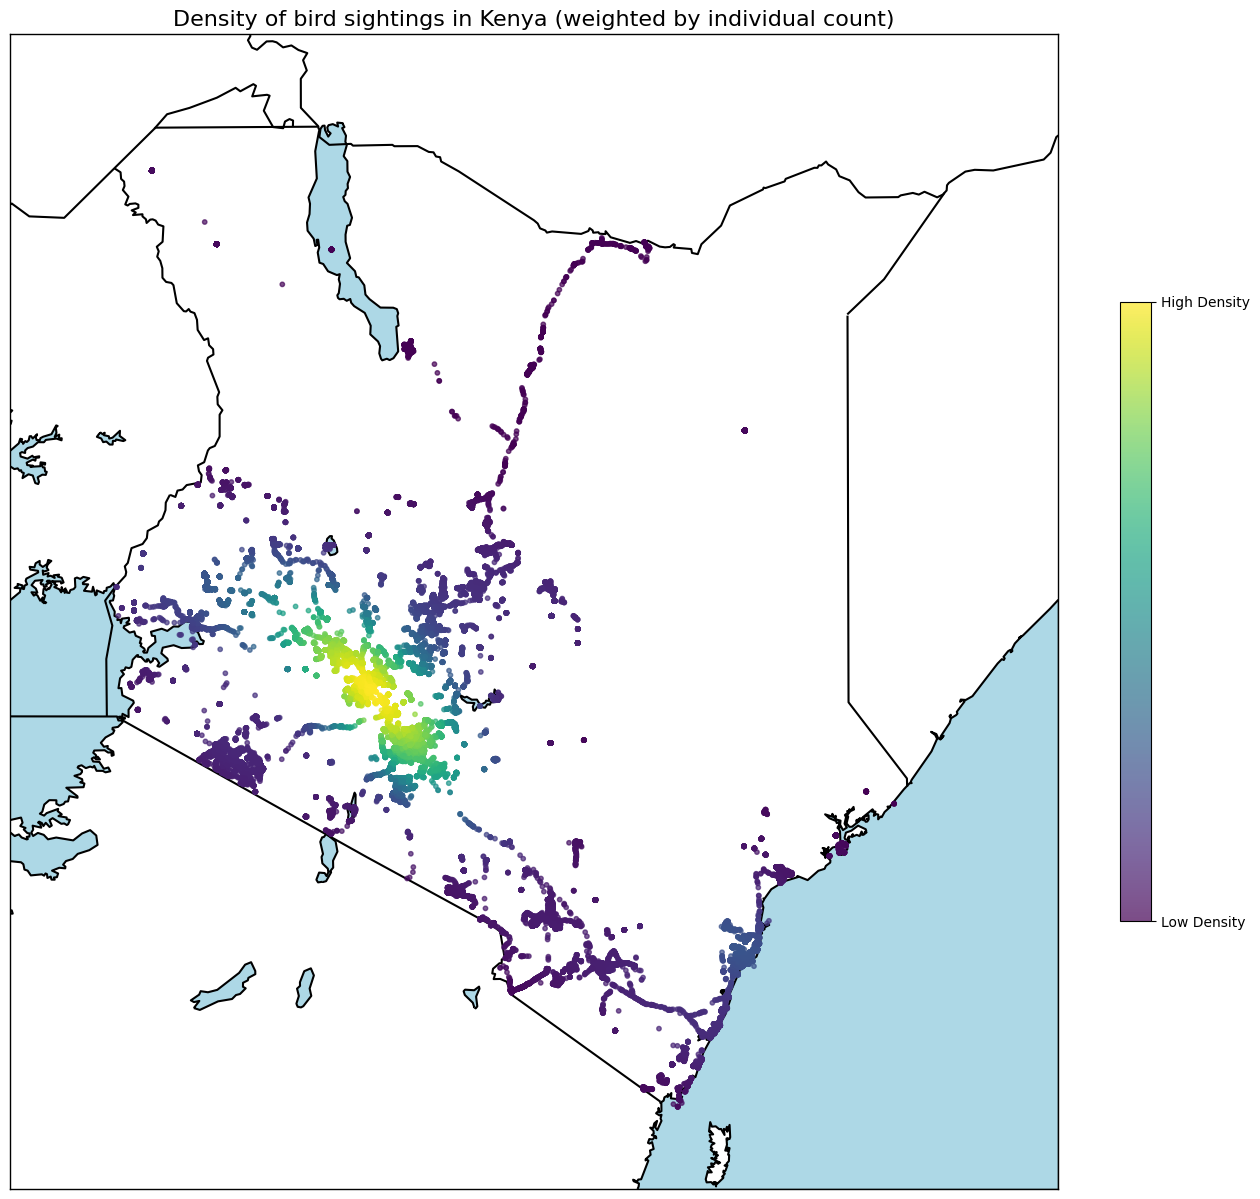

In [47]:
plt.figure(figsize=(20, 15))
m = Basemap(projection='merc',
            llcrnrlat=-5.5, urcrnrlat=5.5,  # Latitude limits
            llcrnrlon=33, urcrnrlon=43,  # Longitude limits
            resolution='i')

m.drawmapboundary(fill_color='lightblue')  # Ocean color
m.fillcontinents(color='white', lake_color='lightblue')  # Land color
m.drawcountries(linewidth=1.5, color='black')  # Country boundaries
m.drawcoastlines(linewidth=1.5, color='black')  # Coastline

# Extract the latitude, longitude, and individualCount columns
latitudes = df['decimalLatitude'].values
longitudes = df['decimalLongitude'].values
individual_counts = df['individualCount'].values  # Weights for KDE

# Create a grid for the density estimation
lon_grid = np.linspace(33, 43, 100)  # Longitude grid
lat_grid = np.linspace(-5.5, 5.5, 100)  # Latitude grid
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Flatten the grid to evaluate the density
positions = np.vstack([lon_mesh.ravel(), lat_mesh.ravel()])
values = np.vstack([longitudes, latitudes])

# Create a Gaussian KDE with weights
kde = gaussian_kde(values, weights=individual_counts)

# Evaluate the density on the grid
density = kde(positions).reshape(lon_mesh.shape)

# Normalize the density for colormap
density_normalized = (density - density.min()) / (density.max() - density.min())

# Create a colormap for the density
cmap = plt.get_cmap('viridis')

# Calculate the density value for each point and map to colors
point_density = kde(np.vstack([longitudes, latitudes]))
colors = cmap((point_density - point_density.min()) / (point_density.max() - point_density.min()))

# Plot the points with the corresponding colors
x_points, y_points = m(longitudes, latitudes)
scatter = m.scatter(x_points, y_points, marker='o', color=colors, zorder=5, alpha=0.7, s=10)

# Add colorbar and set labels
cbar = plt.colorbar(scatter, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Low Density', 'High Density'])

plt.title('Density of bird sightings in Kenya (weighted by individual count)', fontsize=16)
plt.show()

yep big difference